In [18]:
import sympy
sympy.init_printing()

In [4]:
from sympy import I, pi, oo

# 符号

![image](https://wx3.sinaimg.cn/large/69d4185bly1fy7m4092gzj20qe0aqdib.jpg)

```python
y = sympy.Symbol("y", real=True)
y.is_real # True

sympy.Symbol("z", imaginary=True).is_real # False
```

显示的指定符号可以让 SymPy 进行化简操作：
```python
n1 = sympy.Symbol("n")
n2 = sympy.Symbol("n", integer=True)
n3 = sympy.Symbol("n", odd=True)
sympy.cos(n1 * pi)
#cos(πn)
sympy.cos(n2 * pi)
#(-1)^n
sympy.cos(n3 * pi)
#-1
```

一次创建多个：
```python
a, b, c = sympy.symbols("a, b, c", negative=True)
d, e, f = sympy.symbols("d, e, f", positive=True)
```

**特殊符号**
![image](https://wx3.sinaimg.cn/large/69d4185bly1fy7pc7nwq4j20kf04t752.jpg)

## number

SymPy 的数据数据类型与 python 内置的不同，通常 SymPy 会自动转换 python 的数据类型到 SymPy：
```python
In [19]: i = sympy.Integer(19)
In [20]: type(i)
Out[20]: sympy.core.numbers.Integer
In [21]: i.is_Integer, i.is_real, i.is_odd
Out[21]: (True, True, True)
In [22]: f = sympy.Float(2.3)
In [23]: type(f)
Out[23]: sympy.core.numbers.Float
In [24]: f.is_Integer, f.is_real, f.is_odd
Out[24]: (False, True, False)
```

更常见的使用：
```python
In [25]: i, f = sympy.sympify(19), sympy.sympify(2.3)
In [26]: type(i), type(f)
Out[26]: (sympy.core.numbers.Integer, sympy.core.numbers.Float)
```

## 函数
```python
In [41]: x, y, z = sympy.symbols("x, y, z")
In [42]: f = sympy.Function("f")
In [43]: type(f)
Out[43]: sympy.core.function.UndefinedFunction
In [44]: f(x)
Out[44]: f (x)
In [45]: g = sympy.Function("g")(x, y, z)
In [46]: g
Out[46]: g(x, y, z)
In [47]: g.free_symbols
Out[47]: {x, y, z}
```

# 表达式

表达式使用树形结构表示：
```python
In [54]: x = sympy.Symbol("x")
In [55]: expr = 1 + 2 * x**2 + 3 * x**3
In [56]: expr
Out[56]: 3x^3 + 2x^2 + 1
```
![image](https://ws2.sinaimg.cn/large/69d4185bly1fy7pmyqwg0j20b408r74r.jpg)

## 化简

![image](https://ws1.sinaimg.cn/large/69d4185bly1fy8mg7s2m2j20ki05f75k.jpg)

```python
In [67]: expr = 2 * (x**2 - x) - x * (x + 1)
In [68]: expr
Out[68]: 2x^2 - x(x +1)- 2x
In [69]: sympy.simplify(expr)
Out[69]: x(x - 3)
In [70]: expr.simplify()
Out[70]: x(x - 3)
In [71]: expr
Out[71]: 2x^2 - x(x +1)- 2x
```

## 展开

```python
In [78]: expr = (x + 1) * (x + 2)
In [79]: sympy.expand(expr)
Out[79]: x2 + 3x + 2
```
指定类型的展开
```python
In [80]: sympy.sin(x + y).expand(trig=True)
Out[80]: sin(x) cos(y) + sin(y) cos(x)
In [81]: a, b = sympy.symbols("a, b", positive=True)
In [82]: sympy.log(a * b).expand(log=True)
Out[82]: log(a)+ log(b)
```

## 因式分解、Collect、Combine

```python
In [86]: sympy.factor(x**2 - 1)
Out[86]: (x - 1)(x + 1)
In [87]: sympy.factor(x * sympy.cos(y) + sympy.sin(z) * x)
Out[87]: x(sin(x)+cos(y))
```
部分分解
```python
In [89]: expr = x + y + x * y * z
In [90]: expr.collect(x)
Out[90]: x (yz + 1) + y
In [91]: expr.collect(y)
Out[91]: x + y (xz + 1)
```
复杂的连接
```python
In [93]: expr = sympy.cos(x + y) + sympy.sin(x - y)
In [94]: expr.expand(trig=True).collect([sympy.cos(x),
...: sympy.sin(x)]).collect(sympy.cos(y) - sympy.sin(y))
Out[95]: (sin(x)+ cos(x))(-sin(y)+ cos(y))
```

## 分开、合并、约分

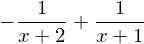

In [9]:
x, y = sympy.symbols('x, y')
sympy.apart(1/(x**2 + 3*x + 2), x)

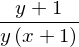

In [10]:
sympy.together(1 / (y * x + y) + 1 / (1+x))

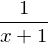

In [11]:
sympy.cancel(y / (y * x + y))

## 替换

```python
In [98]: (x + y).subs(x, y)
Out[98]: 2y
In [99]: sympy.sin(x * sympy.exp(x)).subs(x, y)
Out[99]: sin( ye^y)
```

用于表达式的计算
```python
In [101]: expr = x * y + z**2 *x
In [102]: values = {x: 1.25, y: 0.4, z: 3.2}
In [103]: expr.subs(values)
Out[103]: 13.3
```

# 数值计算

```python
In [104]: sympy.N(1 + pi)
Out[104]: 4.14159265358979
In [105]: sympy.N(pi, 50)
Out[105]: 3.1415926535897932384626433832795028841971693993751
In [106]: (x + 1/pi).evalf(10)
Out[106]: x + 0.3183098862
```
循环计算
```python
In [114]: expr = sympy.sin(pi * x * sympy.exp(x))
In [115]: [expr.subs(x, xx).evalf(3) for xx in range(0, 10)]
Out[115]: [0, 0.774, 0.642, 0.722, 0.944, 0.205, 0.974, 0.977, - 0.870, - 0.695]
```

更高效的矢量化方法
```python
In [111]: expr_func = sympy.lambdify(x, expr, 'numpy')
In [112]: import numpy as np
In [113]: xvalues = np.arange(0, 10)
In [114]: expr_func(xvalues)
Out[114]: array([ 0. , 0.77394269, 0.64198244, 0.72163867, 0.94361635,
0.20523391, 0.97398794, 0.97734066, -0.87034418, -0.69512687])
```

# 微积分

## 导数

**一阶导数**

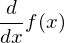

In [12]:
f = sympy.Function('f')(x)
sympy.diff(f, x) # equivalent to f.diff(x)

**二阶导数与多阶导数**

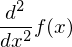

In [13]:
sympy.diff(f, x, x)

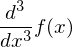

In [14]:
sympy.diff(f, x, 3) # equivalent to sympy.diff(f, x, x, x)

**多元微积分**

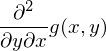

In [15]:
g = sympy.Function('g')(x, y)
g.diff(x, y) # equivalent to sympy.diff(g, x, y)

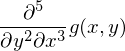

In [16]:
g.diff(x, 3, y, 2) # equivalent to sympy.diff(g, x, x, x, y, y)

## 实际函数求导

```python
In [122]: expr = x**4 + x**3 + x**2 + x + 1
In [123]: expr.diff(x)
Out[123]: 4x^3 + 3x^2 + 2x +1
In [124]: expr.diff(x, x)
Out[124]: 2(6x^2 + 3x +1)
In [125]: expr = (x + 1)**3 * y ** 2 * (z - 1)
In [126]: expr.diff(x, y, z)
Out[126]: 6y(x + 1)^2
```

**更复杂的**

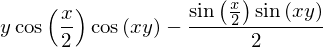

In [20]:
expr = sympy.sin(x * y) * sympy.cos(x / 2)
expr.diff(x)

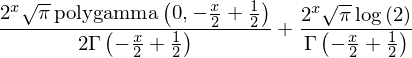

In [21]:
expr = sympy.special.polynomials.hermite(x, 0)
expr.diff(x).doit()

**使用 doit **

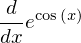

In [26]:
d = sympy.Derivative(sympy.exp(sympy.cos(x)), x)
d

In [25]:
d.doit()

## 积分

**定积分**

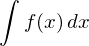

In [27]:
a, b, x, y = sympy.symbols("a, b, x, y")
f = sympy.Function("f")(x)
sympy.integrate(f)

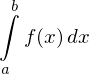

In [28]:
sympy.integrate(f, (x, a, b))

**应用在具体的函数上**

In [29]:
sympy.integrate(sympy.sin(x))

In [30]:
sympy.integrate(sympy.sin(x), (x, a, b))

In [31]:
# 有限和无限（正负）上下限
sympy.integrate(sympy.exp(-x**2), (x, 0, oo))

In [33]:
a, b, c = sympy.symbols("a, b, c", positive=True)
sympy.integrate(a * sympy.exp(-((x-b)/c)**2), (x, -oo, oo))

**遇到无法积分**

返回积分形式

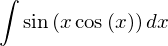

In [34]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

**多元积分**

In [35]:
expr = sympy.sin(x*sympy.exp(y))
sympy.integrate(expr, x)

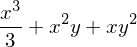

In [36]:
expr = (x + y)**2
sympy.integrate(expr, x)

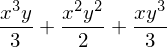

In [37]:
sympy.integrate(expr, x, y)

In [38]:
sympy.integrate(expr, (x, 0, 1), (y, 0, 1))

## 序列

即级数展开, 如下函数在 x=0 处的六级展开

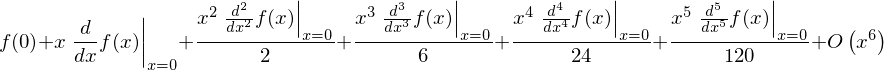

In [39]:
x = sympy.Symbol("x")
f = sympy.Function("f")(x)
sympy.series(f, x)

**指定展开的点**

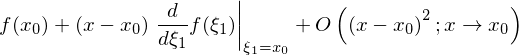

In [40]:
x0 = sympy.Symbol("{x_0}")
f.series(x, x0, n = 2)

**移除误差项**

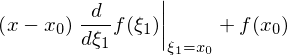

In [41]:
f.series(x, x0, n = 2).removeO()

**具体函数的展开**

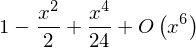

In [42]:
sympy.cos(x).series()

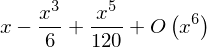

In [43]:
sympy.sin(x).series()

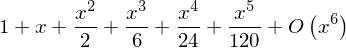

In [44]:
sympy.exp(x).series()

In [46]:
(1/(1+x)).series()

**多元**

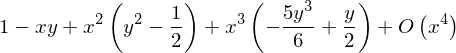

In [47]:
expr = sympy.cos(x) / (1 + sympy.sin(x * y))
expr.series(x, n = 4)

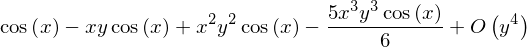

In [48]:
expr.series(y, n = 4)

## 极限

如：
```python
In [161]: sympy.limit(sympy.sin(x) / x, x, 0)
Out[161]: 1
```

**使用极限计算导数**

In [49]:
f = sympy.Function('f')
x, h = sympy.symbols("x, h")
diff_limit = (f(x + h) - f(x))/h
sympy.limit(diff_limit.subs(f, sympy.cos), h, 0)

In [50]:
sympy.limit(diff_limit.subs(f, sympy.sin), h, 0)

**求解上下限**

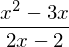

In [51]:
# 下式的近似 f(x) --> px + q
expr = (x**2 - 3*x) / (2*x - 2)
expr

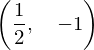

In [52]:
p = sympy.limit(expr/x, x, sympy.oo)
q = sympy.limit(expr - p*x, x, sympy.oo)
p,q

## 求和与乘积

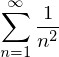

In [54]:
n = sympy.symbols("n", integer=True)
x = sympy.Sum(1/(n**2), (n, 1, oo))
x

In [55]:
x.doit()

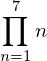

In [57]:
x = sympy.Product(n, (n, 1, 7))
x

In [58]:
x.doit()

In [59]:
x = sympy.Symbol("x")
sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo)).doit().simplify()

# 等式

In [60]:
x = sympy.Symbol("x")
sympy.solve(x**2 + 2*x - 3)

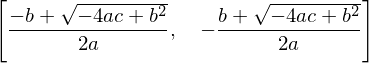

In [61]:
a, b, c = sympy.symbols("a, b, c")
sympy.solve(a * x**2 + b * x + c, x)

**三角式**

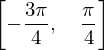

In [62]:
sympy.solve(sympy.sin(x) - sympy.cos(x), x)

**指定表达式的解**

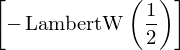

In [63]:
sympy.solve(sympy.exp(x) + 2 * x, x)

**形式解**

In [64]:
sympy.solve(x**5 - x**2 + 1, x)

**多变量**

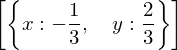

In [66]:
eq1 = x + 2 * y - 1
eq2 = x - y + 1
sympy.solve([eq1, eq2], [x, y], dict=True)

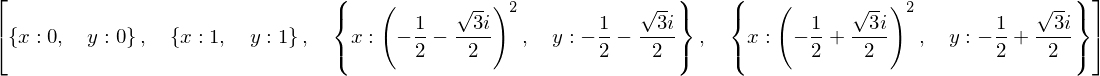

In [67]:
eq1 = x**2 - y
eq2 = y**2 - x
sols = sympy.solve([eq1, eq2], [x, y], dict=True)
sols

**带入验证**

In [68]:
[eq1.subs(sol).simplify() == 0 and eq2.subs(sol).simplify() == 0 for sol in sols]

[True, True, True, True]

# 线性代数

SymPy 中的矩阵只有连个维度
![image](https://ws1.sinaimg.cn/large/69d4185bly1fy8oo9slt3j20kb0dsn00.jpg)

In [69]:
sympy.Matrix([1,2])

In [70]:
sympy.Matrix([[1,2]])

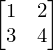

In [71]:
sympy.Matrix([[1, 2], [3, 4]])

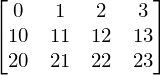

In [72]:
sympy.Matrix(3, 4, lambda m, n: 10 * m + n)

**使用符号表示**

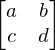

In [73]:
a, b, c, d = sympy.symbols("a, b, c, d")
M = sympy.Matrix([[a, b], [c, d]])
M

**矩阵乘法**

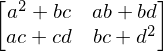

In [74]:
M * M

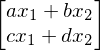

In [75]:
x = sympy.Matrix(sympy.symbols("x_1, x_2"))
M * x

**方程组求解**

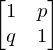

In [76]:
p, q = sympy.symbols("p, q")
M = sympy.Matrix([[1, p], [q, 1]])
M

In [77]:
b = sympy.Matrix(sympy.symbols("b_1, b_2"))
b

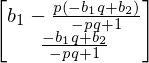

In [79]:
x = M.LUsolve(b)
x

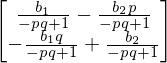

In [80]:
x = M.inv() * b
x